# Aprendizaje No Supervisado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_excel("../Datasets/HVAC.xlsx", "HISTORICO_DATOS", index_col=0)

In [3]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [4]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

## Método Codo

In [5]:
def metodoCodo(X):
    from sklearn.cluster import KMeans
    plt.figure(figsize=(10, 8))
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

## Grafica clusters

In [6]:
def graph_clusters(data, centroides):
    X = np.array(data)
    # Predicting the clusters
    labels = kmeans.predict(data)
    colores = ['tomato','green','cyan','yellow']
    asignar = []
    for row in labels:
        asignar.append(colores[row])
    fig = plt.figure(figsize=(10,5))
    ax = Axes3D(fig)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s=1)
    ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='*', c='black', s=1500)

In [7]:
dataLimpia = pd.read_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)

## C_O_P Carlos

#### Datos sin limpiar de Carlos

In [8]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


#### Datos limpios de Carlos. 

In [9]:
dataCarlosLimpio = dataLimpia[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 
                               'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR CARLOS', 
                               'C_O_P BOMBA CALOR CARLOS']]
dataCarlosLimpio.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS,C_O_P BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.982880,134.031192,18.708072,29.768307,3.643607
std,43.766966,149.088492,8.605477,13.326841,0.377911
min,0.026667,0.251979,-1.400000,0.420000,1.785044
25%,0.480000,10.583311,11.900000,17.400000,3.643607
50%,0.500000,49.993504,18.708072,34.740002,3.643607
75%,67.599998,255.914298,23.717333,42.450001,3.660718
max,164.206665,592.614391,43.799999,47.889999,5.413333


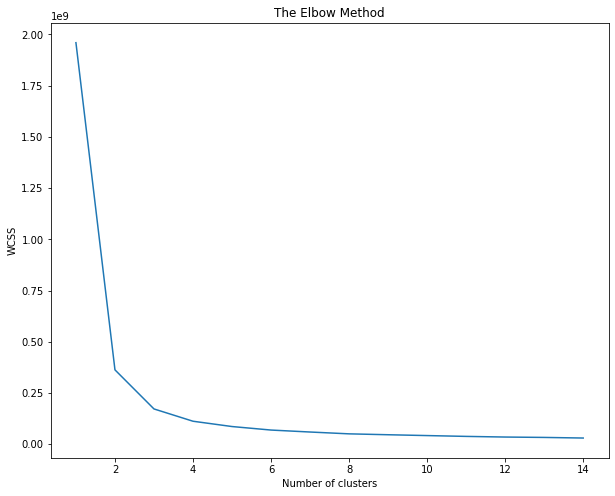

In [10]:
metodoCodo(dataCarlos)

In [11]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_
centroids

array([[ 82.94249181, 303.18634141,  14.84737971,  35.11474082],
       [  2.38373869,  21.66952816,  15.9333983 ,  25.72237854],
       [122.34089804, 439.48954316,  11.39971109,  37.89501681],
       [ 42.12359928, 171.33884746,  14.24421507,  32.21196653]])

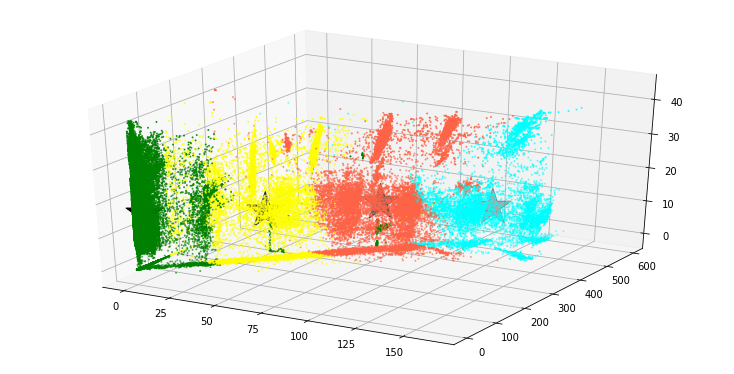

In [12]:
graph_clusters(dataCarlos, centroids)

## C_O_P Felipe

#### Datos sin limpiar de Felipe.

In [13]:
dataFelipe = data3[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
dataFelipe.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,32.952675,114.991659,15.083257,27.899720
std,45.304465,145.959139,11.345877,13.937344
min,0.000000,0.000000,-1.400000,0.000000
25%,0.640000,4.233283,6.968000,14.794000
50%,0.700000,24.492828,13.353139,28.799999
75%,66.543999,227.389796,23.717333,41.980000
max,157.706665,592.815954,43.799999,47.889999


#### Datos limpios Felipe.

In [14]:
dataFelipeLimpio = dataLimpia[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 
                               'TEMPERATURA EXTERIOR','TEMPERATURA SALIDA BOMBA CALOR FELIPE',
                               'C_O_P BOMBA CALOR FELIPE']]
dataFelipeLimpio.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE,C_O_P BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.311907,118.774293,18.708072,28.203867,3.356352
std,45.173629,144.449122,8.605477,13.629520,0.286132
min,0.040000,0.251979,-1.400000,1.166667,1.862510
25%,0.640000,5.291645,11.900000,15.220000,3.356352
50%,0.700000,29.078821,18.708072,28.799999,3.356352
75%,66.543999,227.389760,23.717333,41.980000,3.356352
max,157.706665,551.289112,43.799999,47.889999,4.776893


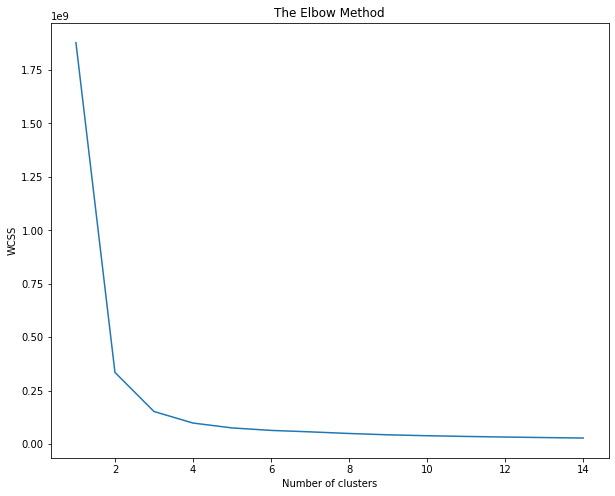

In [15]:
metodoCodo(dataFelipe)

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFelipe)
centroids = kmeans.cluster_centers_
centroids

array([[  3.37596249,  13.42985599,  15.38613756,  25.26021333],
       [ 39.27230968, 155.39934439,  15.27220624,  30.50948506],
       [126.66019206, 417.85944421,  12.57850122,  34.25036269],
       [ 84.01276201, 287.2468723 ,  15.42267829,  32.08079574]])

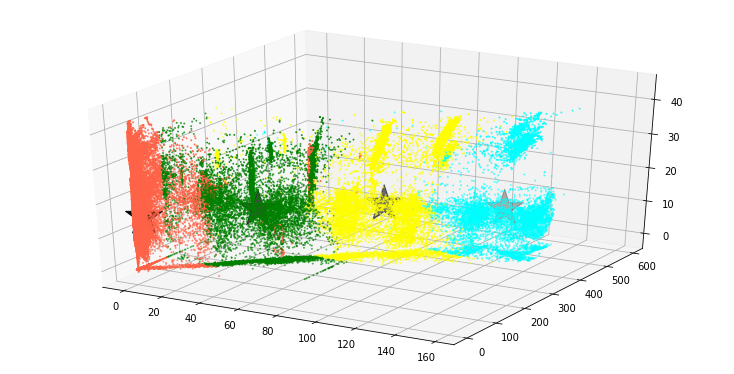

In [17]:
graph_clusters(dataFelipe, centroids)

## C_O_P Grupo Frío 1

#### Datos sin limpiar Grupo Frío 1.

In [18]:
dataFrio1 = data3[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
dataFrio1.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,20.509645,95.445736,15.083257
std,26.984676,117.950837,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,0.100000,22.504057,13.353139
75%,38.900002,172.589200,23.717333
max,115.366669,2373.624850,43.799999


#### Datos limpios Grupo Frío 1. 

In [19]:
dataFrio1Limpio = dataLimpia[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR',
                               'C_O_P MÁQUINA GRUPO FRÍO 1']]
dataFrio1Limpio.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR,C_O_P MÁQUINA GRUPO FRÍO 1
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,20.752592,129.067983,18.708072,5.191439
std,26.858775,103.000351,8.605477,0.936038
min,0.006667,0.465200,-1.400000,3.410380
25%,0.100000,27.679411,11.900000,4.679659
50%,0.100000,129.067983,18.708072,5.191439
75%,38.900002,172.589200,23.717333,5.191439
max,95.966667,523.291850,43.799999,8.099650


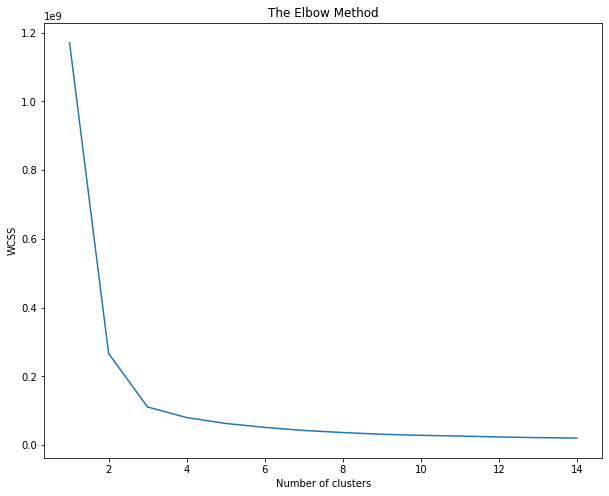

In [20]:
metodoCodo(dataFrio1)

In [21]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio1)
centroids = kmeans.cluster_centers_
centroids

array([[  5.55673627,  10.80102807,  14.56200843],
       [ 47.0598018 , 246.12600911,  15.96881903],
       [ 69.44147914, 345.02946482,  21.97984701],
       [ 26.73028636, 144.0744067 ,  12.73994991]])

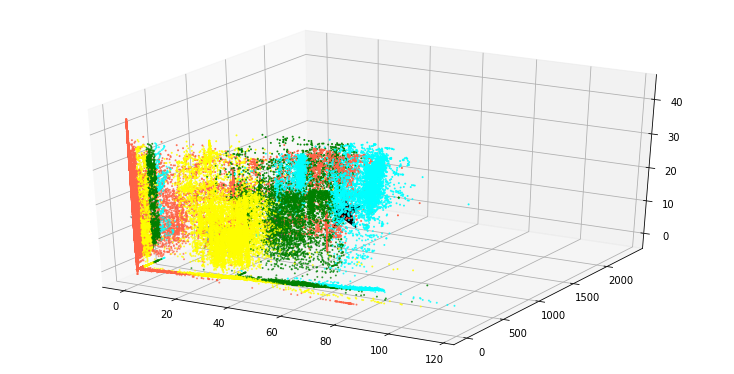

In [22]:
graph_clusters(dataFrio1, centroids)

## C_O_P Grupo Frío 2

#### Datos sin limpiar Grupo Frío 2.

In [23]:
dataFrio2 = data3[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
dataFrio2.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,27.022629,97.791279,15.083257
std,28.751257,117.645826,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,24.876667,28.784257,13.353139
75%,52.560001,165.611200,23.717333
max,93.536667,412.806886,43.799999


#### Datos limpios Grupo Frío 2. 

In [24]:
dataFrio2Limpio = dataLimpia[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR',
                               'C_O_P MÁQUINA GRUPO FRÍO 2']]
dataFrio2Limpio.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR,C_O_P MÁQUINA GRUPO FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,27.399312,190.173695,18.708072,5.319872
std,28.573689,69.326992,8.605477,1.565451
min,0.006667,0.523345,-1.400000,3.171449
25%,0.100000,159.738050,11.900000,4.400816
50%,26.000000,190.173695,18.708072,5.319872
75%,52.560001,190.173695,23.717333,5.319872
max,93.536667,412.806886,43.799999,10.114581


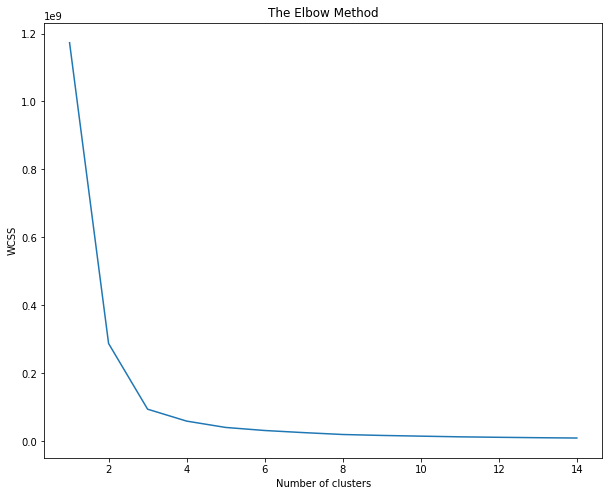

In [25]:
metodoCodo(dataFrio2)

In [26]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio2)
centroids = kmeans.cluster_centers_
centroids

array([[  4.2605467 ,   1.82211187,  13.19036002],
       [ 54.06426049, 227.64109748,  16.74549913],
       [ 39.94826147, 123.48842976,  14.91798045],
       [ 71.13536602, 326.18221717,  21.65591863]])

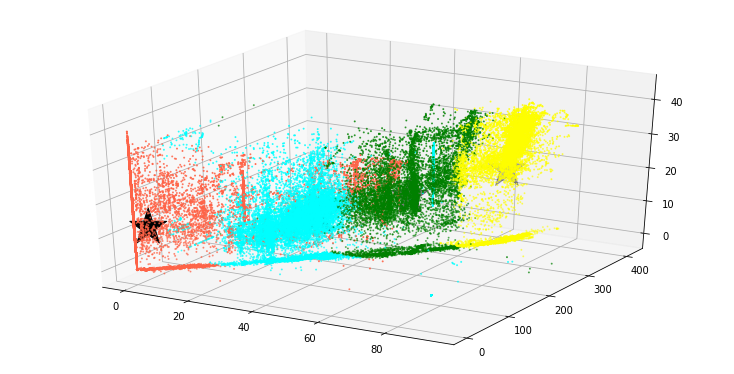

In [27]:
graph_clusters(dataFrio2, centroids)